# Image Classification with the MNIST Dataset

In this section we will do the "Hello World" of deep learning: training a deep learning model to correctly classify hand-written digits.

Objectives of this excercise :

---
* Explore how deep learning addresses challenges that are difficult to solve with traditional programming techniques.
* Get acquainted with the MNIST dataset of handwritten digits.
* Utilize torchvision to load and preprocess the MNIST dataset for model training.
* Design a straightforward neural network for image classification tasks.
* Train the neural network using the prepared MNIST dataset.
* Evaluate how the trained neural network performs on the classification task.

---

Here's a clear and beginner-friendly explanation to introduce loading the libraries :

In [1]:
# Core PyTorch library for tensor operations and GPU acceleration
import torch

# PyTorch module for building neural networks
import torch.nn as nn

# Dataset and DataLoader for managing and batching datasets
from torch.utils.data import Dataset, DataLoader

# Adam optimizer for updating model weights
from torch.optim import Adam

# Torchvision library for prebuilt datasets and vision utilities
import torchvision
torchvision.disable_beta_transforms_warning()

# Transforms for preprocessing and augmenting image datasets
import torchvision.transforms.v2 as transforms

# Functional API for low-level image transformations
import torchvision.transforms.functional as F

# Matplotlib for visualizing images and plotting results
import matplotlib.pyplot as plt

In PyTorch, we can use our GPU in our operations by setting the [device](https://pytorch.org/docs/stable/tensor_attributes.html#torch.device) to `cuda`. The function `torch.cuda.is_available()` will confirm PyTorch can recognize the GPU.

In [2]:
# Check and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


---

In traditional programming, developers explicitly define rules and conditions for a program to follow, allowing it to perform tasks accurately. This method works effectively for solving a wide range of problems.

However, tasks like image classification—which involves assigning an unseen image to its appropriate category—pose significant challenges for traditional programming. It is impractical for a programmer to manually define rules that can account for the vast diversity of images and scenarios, especially for cases they have never encountered before.

---

### Solution to problem is Deep Learning

Deep learning excels at pattern recognition by trial and error. By training a deep neural network with sufficient data, and providing the network with feedback on its performance via training, the network can identify, though a huge amount of iteration, its own set of conditions by which it can act in the correct way.

## Data: The MNIST Dataset

---

In the evolution of deep learning, achieving accurate image classification on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) marked a significant milestone. This dataset, consisting of 70,000 grayscale images of handwritten digits (0 through 9), played a pivotal role in demonstrating the potential of neural networks. Although this task is now considered straightforward, working with MNIST has become the deep learning equivalent of a "Hello World" program, serving as an introductory benchmark for beginners.

---

### Training and Validation Data and Labels

---

When working with images in deep learning, we require both the image data, typically represented as `X`, and their corresponding [labels](https://developers.google.com/machine-learning/glossary#label), represented as `Y`. These pairs of `X` and `Y` values are essential for both *training* the model and *validating* its performance after training.

A helpful analogy is to think of `X` and `Y` pairs as flashcards. A student uses one set of flashcards to study and learns from them. To check their understanding, a teacher might test them using a different set of flashcards. Similarly, in deep learning, we divide the data into distinct sets for training and validation.

For the MNIST dataset, the data is divided into four segments:
1. **`x_train`**: Images used for training the neural network.
2. **`y_train`**: Correct labels corresponding to the `x_train` images, used to measure the model’s accuracy during training.
3. **`x_valid`**: A separate set of images reserved for validating the model’s performance after training.
4. **`y_valid`**: Correct labels for the `x_valid` images, used to evaluate the model’s predictions on the validation set.

The process of organizing and preparing data for analysis is often referred to as [Data Engineering](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7). For a more detailed explanation of the differences between training, validation, and test data, you can refer to [this resource](https://machinelearningmastery.com/difference-test-validation-datasets/) by Jason Brownlee.

---

### Loading the Data Into Memory



---

There are various [deep learning frameworks](https://developer.nvidia.com/deep-learning-frameworks) available, each offering unique features and benefits. In this tutorial, we will be using [PyTorch 2](https://pytorch.org/get-started/pytorch-2.0/), with a focus on the [Sequential API](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html). The Sequential API simplifies the process of building neural networks by providing a collection of built-in functions. It is also a popular choice in professional deep learning workflows due to its [clarity](https://blog.pragmaticengineer.com/readable-code/) and performance. While PyTorch is widely used, exploring other frameworks can be valuable when starting a deep learning project.

Additionally, we will leverage the [TorchVision](https://pytorch.org/vision/stable/index.html) library, which offers tools to streamline deep learning projects. Among its features are modules that provide convenient access to [common datasets](https://pytorch.org/vision/main/datasets.html), such as MNIST.

To begin, we will load the `train` and `valid` datasets for [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

---


In [3]:
train_set = torchvision.datasets.MNIST("./data", train=True, download=False)
valid_set = torchvision.datasets.MNIST("./data", train=False, download=False)


We stated above that the MNIST dataset contained 70,000 grayscale images of handwritten digits. By executing the following cells, we can see that Keras has partitioned 60,000 of these [PIL Images](https://pillow.readthedocs.io/en/stable/reference/Image.html) for training, and 10,000 for validation (after training).

In [4]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [5]:
valid_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

Let's take the first x, y pair from `train_set` and review the data structures:

In [6]:
x_10, y_10 = train_set[10]

In [7]:
x_10

In [8]:
y_10

3

*Note*: The `Split` for `valid_set` is stated as `Test`, but we will be using the data for validation in our hands-on exercises. 

### Prepare image for training



---

In data science, a vector is considered a 1-dimensional array, while a matrix is a 2-dimensional array. Extending this concept, a tensor is an n-dimensional array that can represent data with any number of dimensions. Modern neural network frameworks like PyTorch are designed to process tensors efficiently.

A good example of a 3-dimensional tensor is an image, where the dimensions can correspond to width, height, and color channels (such as RGB). This idea of tensor operations is similar to how video games calculate pixel values using matrix mathematics, which is why GPUs (Graphics Processing Units) are highly effective at processing tensors.

To prepare images for neural network training, they need to be converted into tensors. TorchVision offers a simple method for this conversion using the `ToTensor` class. This class can convert [PIL Images](https://pillow.readthedocs.io/en/stable/reference/Image.html) or NumPy arrays into PyTorch tensors, automatically scaling pixel values to the range [0, 1].

--- 



In [9]:
transform = transforms.Compose([
    transforms.ToTensor()  # Convert image to tensor and normalize to [0, 1]
])

# Apply the transformation
x_10_tensor = transform(x_10)

/home/samritm/.conda/envs/gujcost_workshop/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [10]:
print(x_10_tensor.dtype) #verify the datatype

torch.float32


We can verify the minimum and maximum values. PIL Images have a potential integer range of [0, 255], but the [ToTensor](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html) class converts it to a float range of [0.0, 1.0].

In [11]:
print(x_10_tensor.min())

tensor(0.)


In [12]:
print(x_10_tensor.max())

tensor(0.9961)




---

In PyTorch, the dimensions of an image tensor follow the `C x H x W` format:
- `C`: Number of color channels.
- `H`: Height of the image.
- `W`: Width of the image.

For grayscale images like MNIST, there is a single color channel (`C=1`). Each image is square-shaped, with a height (`H`) and width (`W`) of 28 pixels.

---

In [13]:
x_10_tensor.size()

torch.Size([1, 28, 28])

In [14]:
x_10_tensor #values stored inside the variable

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

By default, a tensor is processed with a [CPU](https://www.arm.com/glossary/cpu).

In [15]:
x_10_tensor.device

device(type='cpu')

To move it to a GPU, we can use the `.cuda` method.

In [16]:
x_10_gpu = x_10_tensor.cuda() # will throw error if no cuda driver or cudatoolkit is found underneath
x_10_gpu.device

device(type='cuda', index=0)


The `.cuda` method can only be used if PyTorch detects a compatible GPU. To make our code more adaptable, we can use the `to` method with the `device` variable defined earlier. This approach ensures that the tensor is sent to the appropriate device—GPU if available, or CPU otherwise. By doing this, our code takes advantage of GPU acceleration when possible, while still functioning correctly on systems without a GPU.

In [17]:
x_10_tensor.to(device).device

device(type='cuda', index=0)

Sometimes, it can be hard to interpret so many numbers. Thankfully, TorchVision can convert `C x H x W` tensors back into a PIL image with the [to_pil_image](https://pytorch.org/vision/main/generated/torchvision.transforms.functional.to_pil_image.html) function.

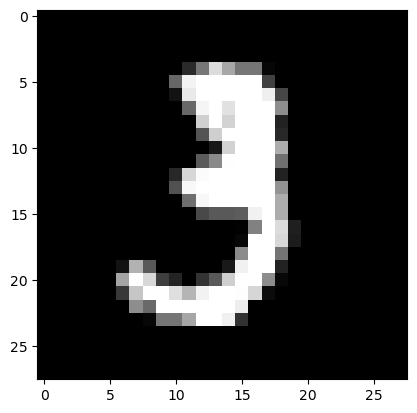

In [18]:
image = F.to_pil_image(x_10_tensor) #display PIL image from tensor values
plt.imshow(image, cmap='gray')

### Preparing the Data for Training

---

Previously, we defined a `trans` variable to handle the conversion of an image into a tensor. [Transforms](https://pytorch.org/vision/stable/transforms.html) in torchvision are a set of utility functions that enable various modifications and preprocessing steps on datasets, such as resizing, normalization, and data augmentation. These transformations can be applied to prepare the dataset for use in a neural network.

---

### Transforms function

In [19]:
trans = transforms.Compose([transforms.ToTensor()])

There are multiple ways we can apply our list of transforms to a dataset. One such way is to set it to a dataset's `transform` variable. 

In [20]:
train_set.transform = trans
valid_set.transform = trans

### Pytorch DataLoaders

---

Think of a dataset as a deck of flashcards. A [DataLoader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders) determines how cards are drawn from this deck to train a machine learning model. While it’s possible to process the entire dataset at once, this approach is computationally expensive. Instead, using smaller batches of data has been shown to improve training efficiency ([source](https://arxiv.org/pdf/1804.07612)).

For instance, if we set a `batch_size` of 32, the model is trained by shuffling the deck and drawing 32 cards at a time. Shuffling is unnecessary for validation since the model is not learning during this phase, but a batch size is still used to manage memory efficiently.

The optimal batch size depends on the specific problem and resources available. However, values like 32 or 64 are commonly sufficient for many tasks and are default settings in some machine learning frameworks. For simplicity, we’ll use a batch size of 32 in this example.

---

In [21]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=32)

### Build a Model



---

Now, let’s build the model! Neural networks consist of layers, where each layer performs specific mathematical operations on the input data before passing it to the next layer. To begin, we’ll construct a basic model consisting of four key components:

1. A [Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer that converts multi-dimensional input data into a one-dimensional vector.
2. An **input layer**, which serves as the first layer of neurons receiving the input data.
3. A **hidden layer**, an intermediate layer of neurons that processes the data and helps the model learn complex patterns.
4. An **output layer**, the final layer that produces the model's predictions.

We’ll store these components in a `layers` variable, which will hold the list of layers for our model.

---

In [22]:
layers = []
layers

[]

When we looked at the shape of our data above, we saw the images had 3 dimensions: `C x H x W`. To flatten an image means to combine all of these images into 1 dimension. Let's say we have a tensor like the one below. Try running the code cell to see what it looks like before and after being flattened.

In [23]:
test_matrix = torch.tensor(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)
test_matrix

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [24]:
nn.Flatten()(test_matrix)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


---

Why didn’t anything happen? Neural networks are designed to process data in batches, but currently, the Flatten layer is seeing three separate vectors instead of a single 2D matrix. To resolve this, we need to "batch" the data by introducing an additional dimension. 

This can be achieved by adding a new pair of brackets to the data. Since `test_matrix` is already a tensor, we can use the shorthand method below. The keyword `None` creates a new dimension, while `:` selects all the elements along that dimension. 

---

In [25]:
batch_test_matrix = test_matrix[None, :]
batch_test_matrix

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [26]:
nn.Flatten()(batch_test_matrix)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

Now that we've gotten the hang of the `Flatten` layer, let's add it to our list of `layers`.

In [27]:
layers = [
    nn.Flatten()
]
layers

[Flatten(start_dim=1, end_dim=-1)]

### The Input Layer


---

The first layer of neurons in our model connects the flattened input image to the rest of the network. For this, we’ll use a [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer, which is a *fully connected layer*. In a fully connected layer, each neuron and its corresponding weights influence every neuron in the subsequent layer.

To initialize the weights for this layer, PyTorch needs two key pieces of information:
1. **The size of the input**: Since our images are flattened, the input size is determined by multiplying the number of channels, the image height (in pixels), and the image width (in pixels).
2. **The number of neurons**: This is a parameter we define, determining how many neurons the layer will contain.

This layer will serve as the foundation for processing the input data and passing it to the deeper layers of the network.

---

In [28]:
input_size = 1 * 28 * 28


---

Deciding on the right number of neurons is part of the "science" in data science, as it involves balancing the model's capacity to capture the dataset's complexity. For now, we’ll use `512` neurons in this layer. Later, you can experiment with this value to observe its impact on training and begin understanding how this choice influences the model's performance.

We’ll also introduce an **activation function**, which helps the network learn more complex patterns. While we’ll dive deeper into activation functions later, for now, we’ll use the [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) (Rectified Linear Unit) activation function. ReLU is widely used because it enables the network to model non-linear relationships in the data, leading to more accurate predictions compared to relying on strictly linear transformations.

---

In [29]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input images
    nn.ReLU(),  # Activation for input
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU()]

### The Hidden Layer


---

Next, we’ll include another fully connected (dense) linear layer in our model. In a later lesson, we’ll explore why adding additional layers of neurons can enhance a model’s ability to learn and capture patterns in the data.

Similar to the input layer, the hidden layer's [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) needs to know the size of the data it will process. Specifically, the number of inputs to the hidden layer matches the number of neurons in the previous layer, as each neuron in the previous layer contributes one value to the next layer. This ensures the layers are properly connected and can pass data effectively through the network.

---

In [30]:
layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU()  # Activation for hidden
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU()]

### The Output Layer

---

Finally, we’ll add the output layer to the model. Since our task is to classify an input image into one of 10 possible categories, the output layer will have 10 neurons—one for each class. The model’s prediction is based on the neuron with the highest output value. A higher value for a specific neuron indicates the model’s confidence that the input image belongs to the class assigned to that neuron.

Unlike the previous layers, we won’t apply the `relu` activation function to the output layer. Instead, a **loss function** will be used to process the outputs, which we’ll discuss in the next section. The loss function is essential for guiding the model’s learning by comparing predictions to the true labels and calculating how far off the predictions are.

---

In [31]:
n_classes = 10

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU(),  # Activation for hidden
    nn.Linear(512, n_classes)  # Output
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

### Compiling the Basic Model

A [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) model expects a sequence of arguments, not a list, so we can use the [* operator](https://docs.python.org/3/reference/expressions.html#expression-lists) to unpack our list of layers into a sequence. We can print the model to verify these layers loaded correctly.

In [32]:
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

Much like tensors, when the model is first initialized, it will be processed on a CPU. To have it process with a GPU, we can use `to(device)`.

In [33]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

To check which device a model is on, we can check which device the model parameters are on. Check out this [stack overflow](https://stackoverflow.com/questions/58926054/how-to-get-the-device-type-of-a-pytorch-module-conveniently) post for more information.

In [34]:
next(model.parameters()).device

device(type='cuda', index=0)

In [35]:
model = torch.compile(model)

### Training the Basic Model

---

With the training and validation data prepared, and our model defined, it’s time to train the model using the training data and evaluate its performance with the validation data.

The process of "training a model" is often referred to as "fitting the model to the data." This term emphasizes that the model's parameters are adjusted during training to better represent and understand the patterns in the data it is provided. Over time, these adjustments enable the model to make increasingly accurate predictions.

---

### Loss and Optimization

---

Similar to how teachers grade students' work, we need a way to evaluate the model's predictions. This evaluation is done using a `loss function`. A loss function measures how far off the model's predictions are from the true answers. 

For this task, we’ll use [CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html), a loss function specifically designed for classification problems. It calculates how well the model predicts the correct category from a set of possible categories, providing feedback that guides the model's learning process.

---

In [36]:
loss_function = nn.CrossEntropyLoss()

Next, we select an `optimizer` for our model. If the `loss_function` provides a grade, the optimizer tells the model how to learn from this grade to do better next time.

In [37]:
optimizer = Adam(model.parameters())

### Calculating Accuracy



---

Although the loss function provides valuable feedback for the model to learn, its results can be difficult for humans to interpret. For this reason, data scientists often include additional metrics, such as accuracy, to better understand the model's performance.

To calculate accuracy, we compare the number of correct predictions made by the model to the total number of predictions. Since we process data in batches during training and evaluation, accuracy can be calculated for each batch and then aggregated.

The total number of predictions corresponds to the size of the dataset. Let’s represent this as `N`. The `batch size`, denoted as `n`, determines how many samples are processed at a time. By keeping track of these values, we can calculate the overall accuracy efficiently.

---

In [38]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

In [39]:
print(train_N) #Total training dataset

60000


In [40]:
print(valid_N) #Total testing dataset

10000




Next, we’ll create a function to compute the accuracy for each batch. This function will calculate the fraction of correct predictions within the batch. By summing up these batch-level accuracies, we can determine the overall accuracy across the entire dataset. This approach ensures that accuracy is calculated efficiently, even when working with data in batches.

In [41]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

### The Train Function to train model

In [42]:
def train():
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        output = model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

### The Validate Function for validating model

In [43]:
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

### The Training Loop



---

To monitor the model's progress, we will alternate between training and validation. Just as a student may need to review their deck of flashcards several times to fully grasp the concepts, the model must pass through the training data multiple times to improve its understanding.

An **epoch** refers to one complete pass through the entire dataset. Let’s train and validate the model for 10 epochs, allowing us to observe how it learns and refines its predictions over time.

---

In [44]:
epochs = 10
torch.set_float32_matmul_precision('high')
for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()

Epoch: 0
Train - Loss: 377.3763 Accuracy: 0.9385
Valid - Loss: 32.1754 Accuracy: 0.9679
Epoch: 1
Train - Loss: 155.6835 Accuracy: 0.9742
Valid - Loss: 28.6509 Accuracy: 0.9714
Epoch: 2
Train - Loss: 110.5302 Accuracy: 0.9815
Valid - Loss: 21.6697 Accuracy: 0.9799
Epoch: 3
Train - Loss: 81.5046 Accuracy: 0.9855
Valid - Loss: 33.1957 Accuracy: 0.9714
Epoch: 4
Train - Loss: 69.6247 Accuracy: 0.9880
Valid - Loss: 23.4122 Accuracy: 0.9787
Epoch: 5
Train - Loss: 52.8135 Accuracy: 0.9909
Valid - Loss: 23.4329 Accuracy: 0.9795
Epoch: 6
Train - Loss: 48.4653 Accuracy: 0.9920
Valid - Loss: 29.2641 Accuracy: 0.9777
Epoch: 7
Train - Loss: 41.7732 Accuracy: 0.9931
Valid - Loss: 28.9173 Accuracy: 0.9787
Epoch: 8
Train - Loss: 39.9343 Accuracy: 0.9934
Valid - Loss: 25.7802 Accuracy: 0.9807
Epoch: 9
Train - Loss: 30.6754 Accuracy: 0.9950
Valid - Loss: 27.6463 Accuracy: 0.9829


testing it on our original sample. We can use our model like a function:

In [45]:
prediction = model(x_10_gpu)
prediction

tensor([[-43.0433, -16.9647, -14.6090,  24.3362, -21.2535,  -7.2119, -46.1297,
         -18.0070, -21.0873, -10.0882]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)

There should be ten numbers, each corresponding to a different output neuron. Thanks to how the data is structured, the index of each number matches the corresponding handwritten number. The 0th index is a prediction for a handwritten 0, the 1st index is a prediction for a handwritten 1, and so on.

We can use the `argmax` function to find the index of the highest value.

In [46]:
prediction.argmax(dim=1, keepdim=True)

tensor([[3]], device='cuda:0')

Did it get it right?

In [47]:
y_10

3

### Summary

MNIST is not only useful for its historical influence on Computer Vision, but it's also a great [benchmark](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf) and debugging tool. Having trouble getting a fancy new machine learning architecture working? Check it against MNIST. If it can't learn on this dataset, chances are it won't learn on more complicated images and datasets.

### Clear the Memory

Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [48]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}